### Data  
- foundation is a dataset of approximately 1000 single page documents from the Handelsregister 
- it includes mostly documents containing some sort of "Anmeldung an das Handelsregister"

### Clustering  
- idea: cluster the data to see if indiviual groups are distinguishable 
- result: unfortunately, the documents are to similar in content to be able to effectively cluster them  
    -> still valuable information for me

- Anmerkung Jan:  
    -> Daten zusenden  
    -> umap-Test?  
    -> Tabelle mit Ergebnissen in MA (2 Spalten: 1(Methode), 2 (Ergebnis: zeigt 2 Cluster bei n =2: ja/nein?))

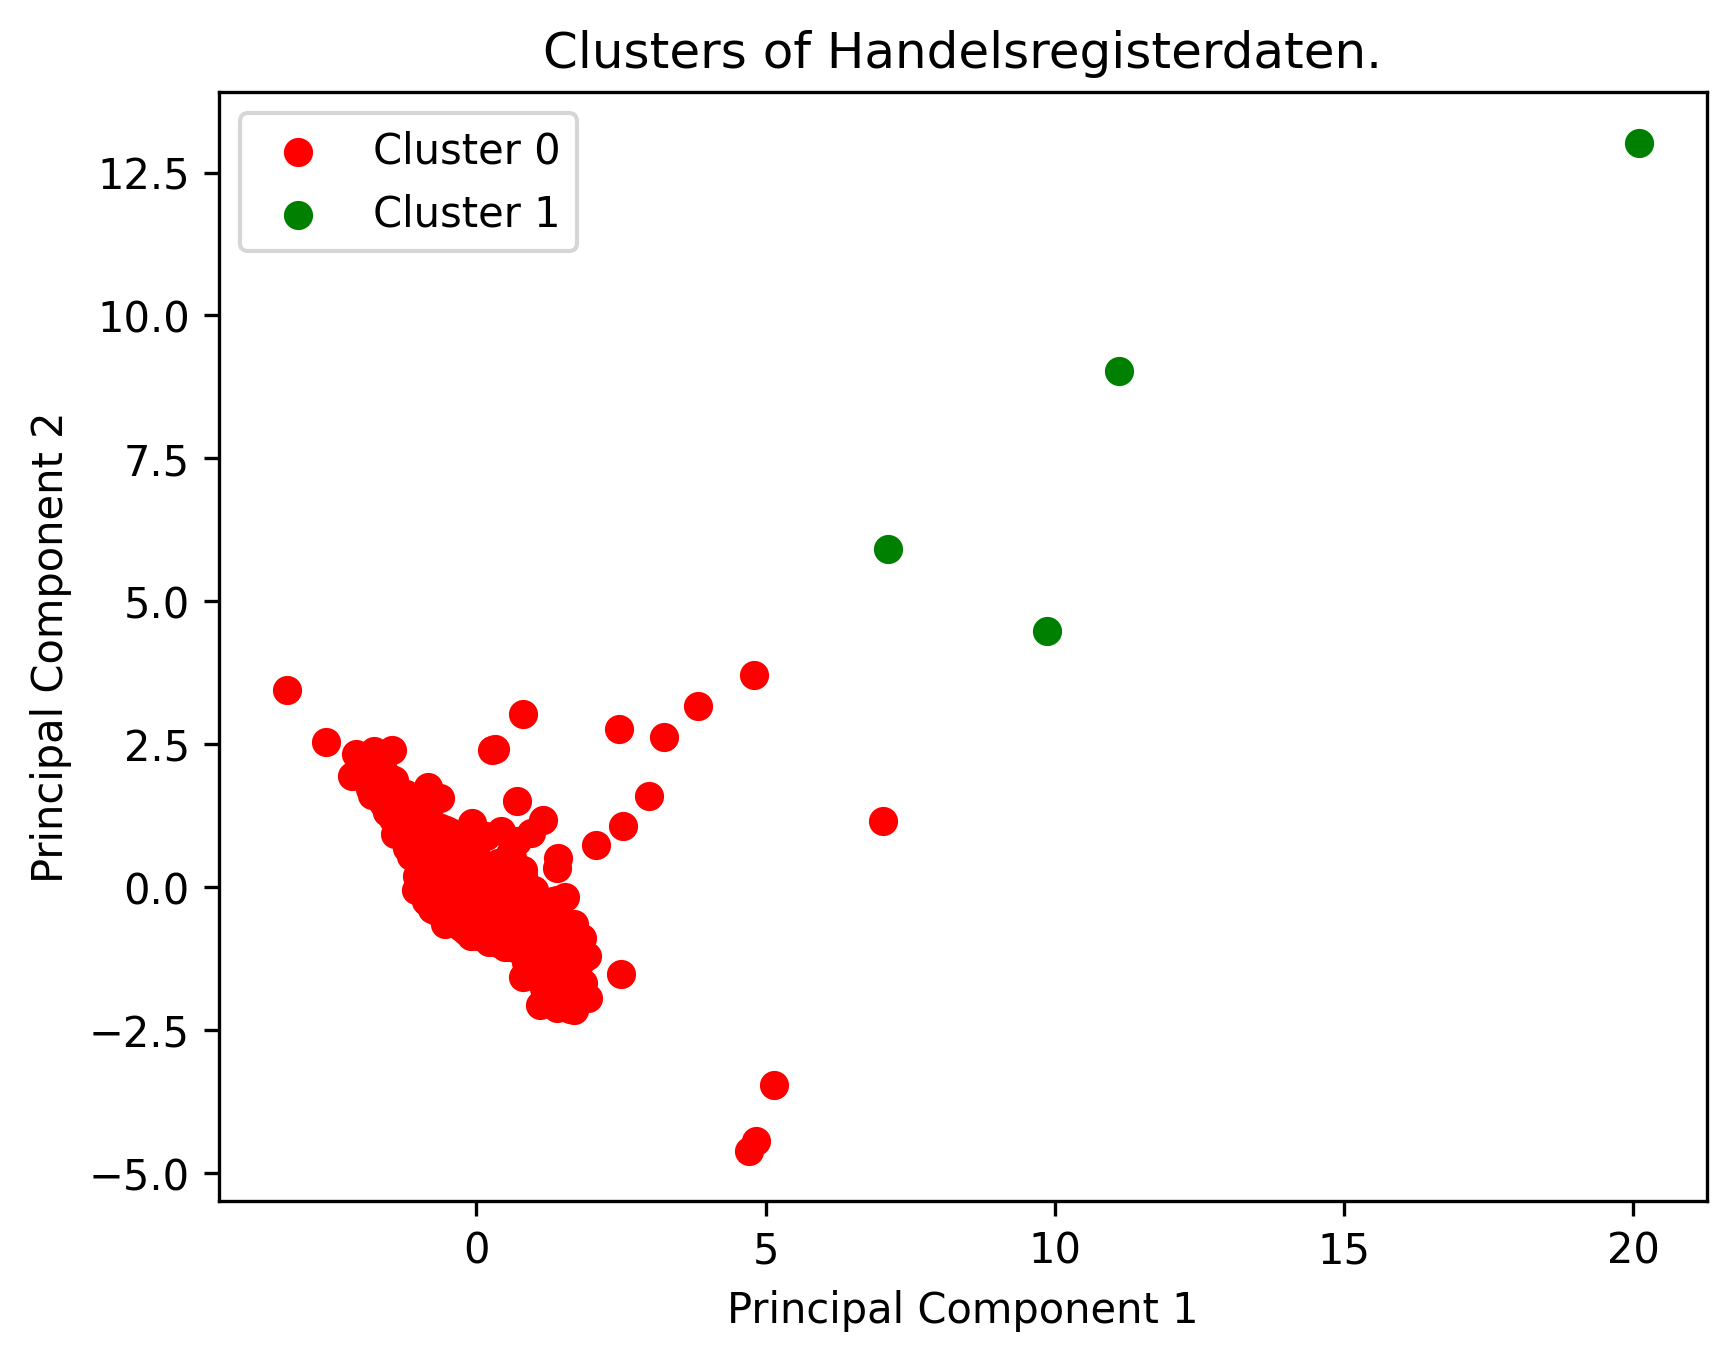

### Annotation  
- to apply effectively a custom ner model, annotated is necessary to be able to train the model 
- 10% of the sample was taken as TRAINING_DATA  
    -> to validate the effectiveness of the TRAINING_DATA, another 10% where annotated as EVALUATION_DATA
- doccano was used as annotation tool

Anmerkung Jan: 
- EVALUATION_DATA split into two parts: EVAL and TEST
- Cross-Validation
- neu splitten: 70% Trainingsdaten, 10% Evaluation, 20% Test

##### Annotation Labels  
- approach: first trying a fine-grained annotation  
    -> if this should result in ineffectiveness than a coarser approach is tried

- entities:
    - general: DATE, HRA/HRB, DOCUMENT_NUMBER, LOCATION (if it is not clearly connected to one other entity)
    - regarding someone involved with the company: NAME, NAME_STREET, NAME_POSTAL_CODE, NAME_LOCATION, BIRTH_DATE
    - regarding the mentioned company: COMPANY, COMPANY_STREET, COMPANY_POSTAL_CODE, COMPANY_LOCATION
    - regarding the mentioned court: COURT, COURT_STREET, COURT_POSTAL_CODE, COURT_LOCATION
    - regarding mentioned notary: NOTARY, NOTARY_STREET, NOTARY_POSTAL_CODE, NOTARY_LOCATION  
  
    - neglectable: CONTENT

Anmerkung Jan: 
- CONTENT als Feature, Information rausfiltern. 
- Warum nicht POSITION als Entität? Begründen.

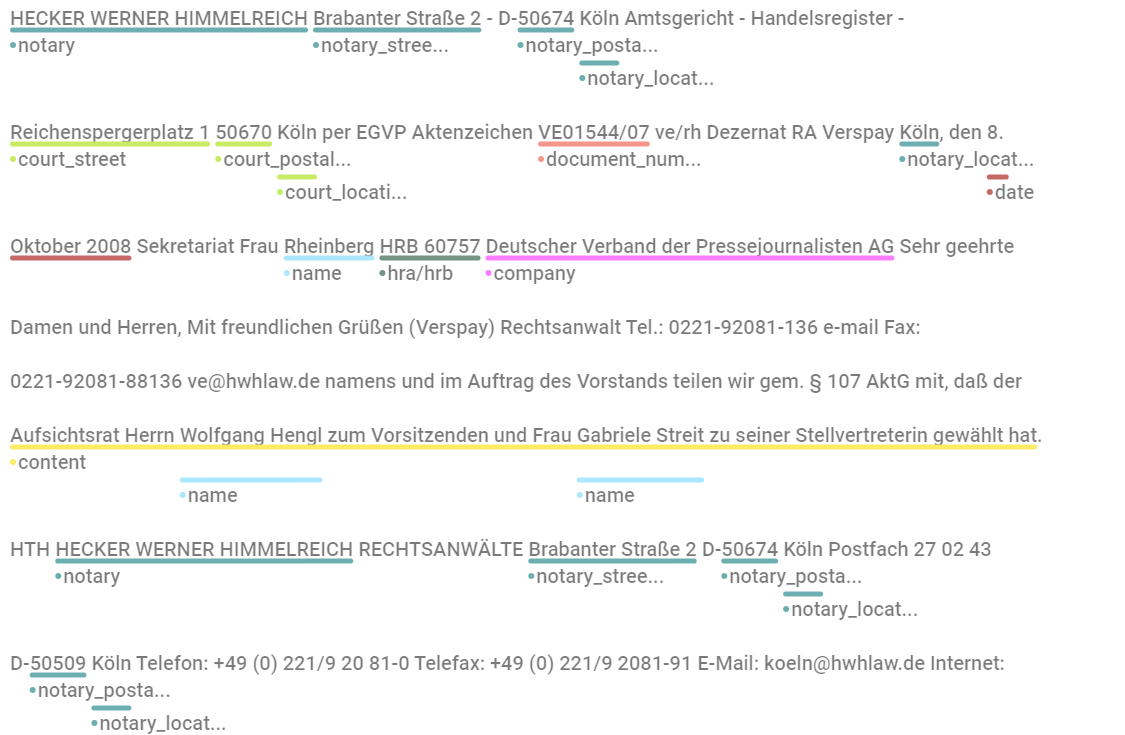

### TEST_O: SpaCy-Pipeline  
- use the given spacy pipeline to see what happens with my data

In [9]:
%run /home/teppi/projects/master/app/spacy_test_0.py

Urkundenrolle PER
Notarkanzlei LOC
Johann-Gottfried-Pahl-Straße LOC
Aalen LOC
Ulm LOC
Zeughausgasse MISC
Ulm HRB LOC
GUIRAUD ORG
Ulm Handelsregisteranmeldung I. LOC
Andreas Kirsch PER
Talstraße LOC
Staig LOC
Andreas Kirsch PER


- result: entities are recognized, but is it possible to specify the entities even more? 

Anmerkung Jan: 
- in MA einfügen: könnte interessant sein und aufhübschen. 

### TEST_1: creating custom SpaCy-model  
- create a blank German Language Model 
- add ner pipeline to this model
- train 
- save model 

Anmerkung Jan: 
- Zeitmodul implementieren: Gut zu wissen, wie lange etwas braucht


##### Evaluation of TEST_1

Anmerkung Jan: 
- hier werden Testdaten verwendet
- Validierungsdaten ist besserer Name -> einbauen. 

In [7]:
%run /home/teppi/projects/master/app/spacy_evaluate_1.py

/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Amtsgericht Frankfurt am Main Handelsregister K + ..." with entities "[[46, 84, 'COMPANY'], [85, 94, 'HRA/HRB'], [297, 3...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "HECKER WERNER HIMMELREICH Brabanter Straße 2 - D-5..." with entities "[[26, 44, 'NOTARY_STREET'], [49, 54, 'NOTARY_POSTA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/train

Precision: 0.5707213578500707
Recall: 0.5166453265044815
F1 score: 0.5423387096774194


### Next Steps in NER
- parameter adjust  (epochen, early stopping, overfitting)
- fine-tune on the German LM to see if performance improves when more data is involved
- test another library which uses spacy as foundation but performs differently: zshot
- use transformers on the basis of spacy to see what kind of performance boost could be possible 

### Next Steps Overall

- find out how Named Entitiy Linking is possible
    -> creating a Graph, which library (Zshot)
- find formating for MAs and implement a project on Overleaf
- find out why Git is making insufferable problems
- (probably not executable: ) IDEA: could I create a database with the extracted information? 

### Anmerkung Jan: Next Steps  
- begründen, warum Model von 0 an zu trainieren 
- Domain Adaption, Fine-Tuning
- andere Spacy-Modelle
- Schritt 2: mit Vorwissen trainieren 
- wenn Experimente nicht gut genug, dann mehr annotieren -> Hypothese, zu wenig Daten
- Visualisierung aufpeppen
- Funktionen bauen 